In [87]:
# Import statements

import rasterio
import rasterio.plot
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import geopandas as gpd
from ast import literal_eval
import os
import random

In [2]:
# Import the GeoJSON file here

gdf = gpd.read_file(open('./image_tiles/1/boundingboxes-all-damagearea-pixelcoords.geojson'))

In [100]:
# Select the tif file you want to work with here, as well as the folder that stores the tif files (if necessaary)

# Folder where tif files are stored
tif_folder = './image_tiles/1'
if tif_folder[1:] not in os.getcwd():
    os.chdir(tif_folder)

# Name of tif file
mytif = '20170830aC0952830w294630n_1_2.tif'

In [104]:
# Alternatively, run this cell to randomly select a tif file from your folder

# Folder where tif files are stored
tif_folder = './image_tiles/1'
if tif_folder[1:] not in os.getcwd():
    os.chdir(tif_folder)

# Select random file
random_file = random.choice(os.listdir(os.getcwd()))
mytif = random_file

In [ ]:
# NOTE: Only run this once after tiling all your tif files!
# Determine if a tile has any buildings
# - If the tile does not contain any buildings, it is moved to a new folder (nobuild) that stores all tiles without
#   buildings

directory = "./image_tiles/1"
directory_nobuild = "./image_tiles/1/nobuild"

if not os.path.exists(directory_nobuild):
    os.makedirs(directory_nobuild)

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    ext = os.path.splitext(f)[-1].lower()
    if os.path.isfile(f) and ext == ".tif":
        with rasterio.open(f,"r") as r:
            extent=[r.bounds[0], r.bounds[2], r.bounds[1], r.bounds[3]]
            xmin, xmax, ymin, ymax = extent
        if len(gdf.cx[xmin:xmax, ymin:ymax]) == 0:
            f_new = os.path.join(directory_nobuild, filename)
            os.rename(f, f_new)

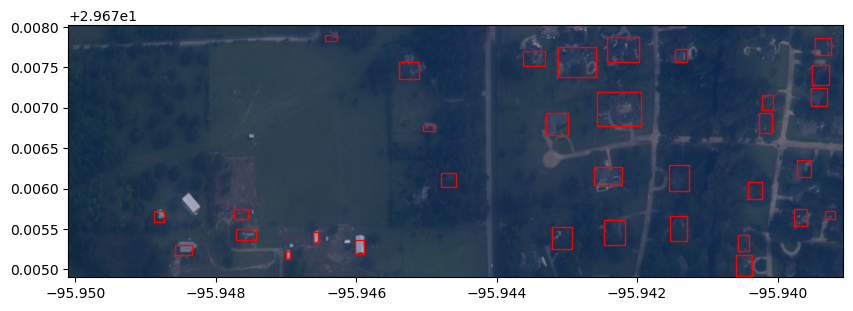

In [105]:
# Using Geospatial Coordinates

fig, ax = plt.subplots(figsize=(10,10))
with rasterio.open(mytif,"r") as r:
    extent=[r.bounds[0], r.bounds[2], r.bounds[1], r.bounds[3]]
    rasterio.plot.show(r.read(), extent=extent, ax=ax)
    xmin, xmax, ymin, ymax = extent
    gdf_array = gdf.cx[xmin:xmax, ymin:ymax]
    gdf_array_filtered = gdf_array[gdf_array['image'].str.contains(mytif)]
    gdf_array_filtered.plot(ax=ax, color=None, facecolor="none", edgecolor='r')

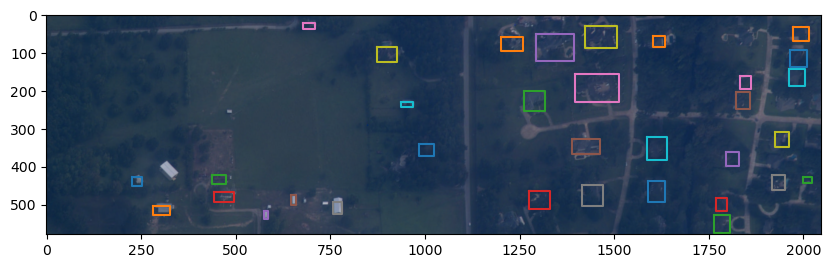

In [106]:
# Using Pixel Coordinates
fig, ax = plt.subplots(figsize=(10,10))
with rasterio.open(mytif, "r") as r:
    extent=[r.bounds[0], r.bounds[2], r.bounds[1], r.bounds[3]]
    xmin, xmax, ymin, ymax = extent
    gdf_array = gdf.cx[xmin:xmax, ymin:ymax]
    gdf_clipped = gdf_array[gdf_array['image'].str.contains(mytif)]
    plt.imshow(np.moveaxis(r.read(), 0, 2))
    bb = np.array(gdf_clipped['bb'].apply(literal_eval).to_list())
    bb_xmin = bb[:,0]
    bb_ymin = bb[:,1]
    bb_xmax = bb[:,2]
    bb_ymax = bb[:,3]
    boxes = np.array([[bb_xmin, bb_ymin],[bb_xmin, bb_ymax],[bb_xmax, bb_ymax],[bb_xmax, bb_ymin],[bb_xmin, bb_ymin]])
    plt.plot(boxes[:,0,:], boxes[:,1,:])